In [1]:
# %load outlier_removal_regression.py
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

C:\Users\JehyeonHeo\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

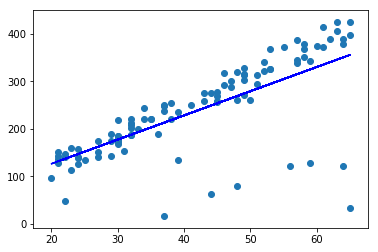

In [13]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [14]:
#What slope does your regression have?
print "Slope:", reg.coef_[0][0]

Slope: 5.07793064344


In [15]:
#What is the score you get when using your regression to make predictions with the test data?
print "Score:", reg.score(ages_test, net_worths_test)

Score: 0.878262470366


In [3]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

(30, 177.46485912830926, 0.083081720534266879)
(32, 187.09760490789751, 0.6061972278265273)
(29, 173.54835439167368, 1.0783441862704422)
(32, 186.46155999388083, 1.2422421418432066)
(49, 271.75164334973937, 2.2769797244690722)
(45, 256.83312700057957, 3.1162265001321714)
(38, 221.33012794213624, 3.1587419457706574)
(21, 128.4847139765763, 3.3618510813048772)
(22, 140.9273656237994, 4.00286992247797)
(21, 136.08924543132068, 4.242680373439498)
(45, 259.12330051987942, 5.4064000194320272)
(24, 140.78722458080426, 6.2931324073977066)
(33, 200.22792608821422, 7.4461933090499315)
(30, 185.1870343522352, 7.6390935033916776)
(24, 139.40479592465923, 7.6755610635427445)
(48, 260.8065975224045, 8.1440949083636838)
(30, 186.05979756839332, 8.5118567195497974)
(21, 142.1012008717193, 10.254635813838121)
(30, 167.24337759331152, 10.304563255532003)
(27, 151.96564953554724, 10.34849938297549)
(24, 157.51396036691344, 10.433603378711467)
(51, 294.82586751838659, 10.641383157297639)
(22, 147.76534866

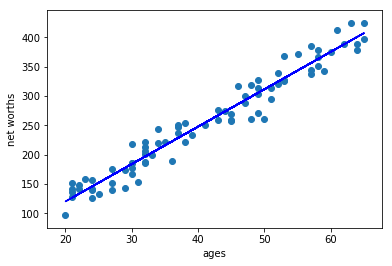

In [4]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [6]:
#What is new slope?
print "New slope:", reg.coef_[0][0]

New slope: 6.36859480694


In [7]:
#What is new score?
print "New score:", reg.score(ages_test, net_worths_test)

New score: 0.983189455396
